In [2]:
import os 
os.getcwd()

'C:\\Users\\dasbi\\Jupyter\\Customer Segmentation Hackathon'

Final submission code for a AV customer segmentation hackathon <br/>
https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/True/#DiscussTab <br/>
Private leaderboard rank - 12 <br/>


In [3]:
import pandas as pd

In [4]:
train = pd.read_csv("Train.csv")

In [5]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


<AxesSubplot:>

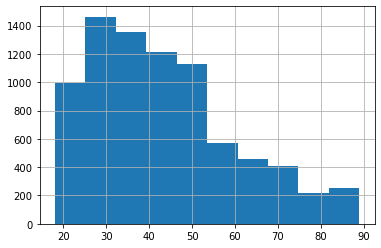

In [7]:
train.Age.hist()

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Null Value imputation

In [9]:
null_columns = train.columns[train.isnull().any()]

In [10]:
train[null_columns].isnull().sum()

Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64

In [11]:
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum()/train.shape[0]*100

Ever_Married        1.735250
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Family_Size         4.152206
Var_1               0.941993
dtype: float64

In [12]:
train.skew()

ID                 0.002435
Age                0.696021
Work_Experience    1.306226
Family_Size        1.010804
dtype: float64

In [13]:
train.kurtosis()

ID                -1.201299
Age               -0.145452
Work_Experience    0.526030
Family_Size        1.263156
dtype: float64

Null value imputation

<AxesSubplot:>

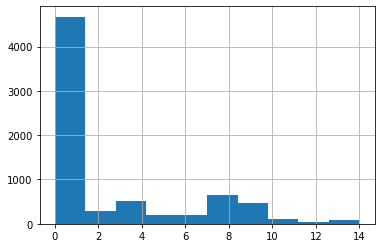

In [14]:
# imputing work ex and 
train.Work_Experience.hist()

In [15]:
#df = df[df.line_race != 0]
train[train.Ever_Married.isnull()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat_3,B
108,466466,Female,NaN,19,No,Healthcare,6.0,Low,5.0,Cat_3,D
201,466065,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
213,460516,Female,NaN,85,No,Lawyer,0.0,High,1.0,Cat_3,C
272,464841,Male,NaN,19,No,Entertainment,0.0,High,3.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...
7756,465987,Male,NaN,20,No,Healthcare,1.0,Low,3.0,Cat_2,D
7775,462989,Male,NaN,32,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8011,466026,Female,NaN,49,No,Entertainment,0.0,Low,1.0,Cat_3,A
8030,459082,Male,NaN,45,Yes,Artist,1.0,Low,NaN,Cat_6,A


In [16]:
train.loc[ train.Work_Experience.isnull(), 'Work_Experience'] = train.groupby('Age').Work_Experience.transform('mean')[train.Work_Experience.isnull()]

In [17]:
train.loc[ train.Family_Size.isnull(), 'Family_Size'] = 0

In [18]:
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum()/train.shape[0]*100

Ever_Married    1.735250
Graduated       0.966782
Profession      1.536936
Var_1           0.941993
dtype: float64

In [19]:
train[train.Ever_Married.isnull() | train.Graduated.isnull() | train.Profession.isnull()].shape[0]/train.shape[0]*100

4.053049082796232

In [20]:
train.drop(train[train.Ever_Married.isnull() | train.Graduated.isnull() | train.Profession.isnull()].index, inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7741 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7741 non-null   int64  
 1   Gender           7741 non-null   object 
 2   Ever_Married     7741 non-null   object 
 3   Age              7741 non-null   int64  
 4   Graduated        7741 non-null   object 
 5   Profession       7741 non-null   object 
 6   Work_Experience  7741 non-null   float64
 7   Spending_Score   7741 non-null   object 
 8   Family_Size      7741 non-null   float64
 9   Var_1            7669 non-null   object 
 10  Segmentation     7741 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 725.7+ KB


In [22]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,7741.000000,7741.000000,7741.000000,7741.000000
mean,463470.630280,43.509237,2.636967,2.734401
std,2591.023084,16.697563,3.247698,1.595938
min,458982.000000,18.000000,0.000000,0.000000
25%,461260.000000,31.000000,0.000000,2.000000
50%,463450.000000,40.000000,1.000000,2.000000
75%,465714.000000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [23]:
7741/8068.000000

0.9594695091720377

In [24]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,3.423469,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,3.782609,High,6.0,Cat_6,A


In [25]:
train.Segmentation.unique()

array(['D', 'A', 'B', 'C'], dtype=object)

Since classes are more or less balanced, moving ahead without any sampling changes

In [26]:
train.groupby('Segmentation').ID.count()

Segmentation
A    1886
B    1791
C    1916
D    2148
Name: ID, dtype: int64

In [27]:
train.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.001405,-0.024383,0.008381
Age,-0.001405,1.000000,-0.201409,-0.255317
Work_Experience,-0.024383,-0.201409,1.000000,-0.060976
Family_Size,0.008381,-0.255317,-0.060976,1.000000


In [28]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,3.423469,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,3.782609,High,6.0,Cat_6,A


In [29]:
pd.get_dummies(train['Spending_Score'])

,Average,High,Low
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
8062,0,1,0
8064,0,0,1
8065,0,0,1
8066,0,0,1


looking for any possible outliers in the data 

In [30]:
import numpy as np
def percentile_OD(data_list,thresh=1):
    P = np.percentile(data_list,[thresh,(100-thresh)])
    return np.where(np.logical_or(np.less(data_list,P[0]),np.greater(data_list,P[1])))
c = percentile_OD(train['Work_Experience'])
train.iloc[c[0],:]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
42,464590,Female,No,27,Yes,Artist,14.0,Low,3.0,Cat_6,A
55,462110,Male,Yes,32,Yes,Artist,14.0,Average,2.0,Cat_6,B
338,460255,Female,No,38,Yes,Doctor,14.0,Low,1.0,Cat_6,A
455,460344,Female,Yes,52,Yes,Artist,14.0,Average,2.0,Cat_6,C
517,460666,Female,Yes,49,Yes,Homemaker,14.0,Low,1.0,Cat_6,A
531,462314,Female,No,28,No,Doctor,14.0,Low,1.0,Cat_6,A
842,462551,Male,Yes,53,Yes,Doctor,14.0,Average,2.0,Cat_6,B
1226,459636,Male,No,30,Yes,Entertainment,14.0,Low,1.0,Cat_6,D
1232,460918,Female,No,27,Yes,Doctor,14.0,Low,8.0,Cat_6,C
1264,459100,Female,No,63,Yes,Artist,14.0,Low,1.0,Cat_6,B


In [31]:
cm = train.corr()
cm.style.background_gradient()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.001405,-0.024383,0.008381
Age,-0.001405,1.000000,-0.201409,-0.255317
Work_Experience,-0.024383,-0.201409,1.000000,-0.060976
Family_Size,0.008381,-0.255317,-0.060976,1.000000


In [32]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,3.423469,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,3.782609,High,6.0,Cat_6,A


Labelling necessary columns 

In [33]:
train['Gender_x'] = 0
train.loc[train.Gender=='Male','Gender_x'] = 1
del train['Gender']

In [34]:
train['Ever_Married_x'] = 0
train.loc[train.Ever_Married=='Yes','Ever_Married_x'] = 1
del train['Ever_Married']

In [35]:
train['Graduated_x'] = 0
train.loc[train.Graduated=='Yes','Graduated_x'] = 1
del train['Graduated']

In [36]:
train['Spending_Score_x'] = 2
train.loc[train.Spending_Score=='Low','Spending_Score_x'] = 1
train.loc[train.Spending_Score=='High','Spending_Score_x'] = 3
del train['Spending_Score']

In [37]:
train.sample(5)

,ID,Age,Profession,Work_Experience,Family_Size,Var_1,Segmentation,Gender_x,Ever_Married_x,Graduated_x,Spending_Score_x
4737,460888,42,Homemaker,8.0,1.0,Cat_6,A,1,1,0,1
5870,459584,20,Healthcare,1.0,3.0,Cat_6,D,0,0,0,1
6085,464308,75,Lawyer,0.0,2.0,Cat_6,B,0,1,1,3
4362,459055,19,Entertainment,1.0,5.0,Cat_6,D,0,0,0,1
2814,463594,35,Artist,7.0,2.0,Cat_6,C,0,1,1,2


Creating dummies of the remaining categorical columns 

In [38]:
pd.get_dummies(train.drop(columns = ['Segmentation','ID']),columns = ['Profession','Var_1']).columns

Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_x', 'Ever_Married_x',
       'Graduated_x', 'Spending_Score_x', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

Testing random forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_dum = pd.get_dummies(train.drop(columns = ['Segmentation','ID']),columns = ['Profession','Var_1'])

factor = pd.factorize(train['Segmentation'])
train.Segmentation = factor[0]
definitions = factor[1]

X_train, X_test, y_train, y_test = train_test_split(x_dum,train['Segmentation'],test_size = 0.3,random_state = 111)
sample_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth = 4,max_features=9) #criterion = 'entropy/gini'

In [40]:
sample_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=9)

In [41]:
y_pred = sample_rf.predict(X_test)

In [42]:
reversefactor = dict(zip(range(4),definitions))
y_test_x = np.vectorize(reversefactor.get)(y_test)
y_pred_x = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred_x, rownames=['Actual'], colnames=['Predicted']))

Predicted    A    B    C    D
Actual                       
0          120   35   13  454
1          261   83   95  115
2          145  130  195   68
3           75   67  383   84


In [43]:
definitions

Index(['D', 'A', 'B', 'C'], dtype='object')

In [44]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.5286267757210503


In [375]:
import time

In [376]:
%%time
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt', criterion = 'entropy' ,n_estimators=50,max_depth = 4)  

param_grid = { 
    'n_estimators': [25,50,75,100,125,150,200,220,250,270],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['entropy','gini'],
    'max_depth' : [3,5,7,9,10,12,14]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)
print(CV_rfc.best_params_)

KeyboardInterrupt: 

In [45]:
tx = RandomForestClassifier(n_jobs=-1,max_features= 'auto', criterion = 'entropy' ,n_estimators=200,max_depth = 10)  

In [46]:
tx.fit(X_train,y_train)
y_pred = tx.predict(X_test)

In [47]:
y_test

2073    2
3264    1
2731    2
1646    2
2380    0
       ..
543     2
3172    2
4968    3
5682    2
6991    2
Name: Segmentation, Length: 2323, dtype: int64

In [48]:
print(metrics.accuracy_score(y_test, y_pred))

0.5312096427034008


In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gbx = GradientBoostingClassifier(loss = 'deviance',n_estimators =100)
param_grid = { 
    'loss': ['deviance','exponential'],
    'n_estimators' : [90,110,170,200,220],
    'criterion' : ['friedman_mse','mse','mae'],
    'max_depth' : [3,7,10],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gbx = GridSearchCV(n_jobs=-1,estimator=gbx, param_grid=param_grid, cv= 5, scoring='accuracy', verbose=10)
CV_gbx.fit(X_train,y_train)
print(CV_gbx.best_params_)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

In [ ]:
 #criterion=mae, loss=deviance, max_depth=3, max_features=log2, n_estimators=220,

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gx = GradientBoostingClassifier(criterion='mae', loss='deviance', max_depth=3, max_features='log2', n_estimators=220)

In [51]:
gx.fit(X_train,y_train)
y_pred = gx.predict(X_test)

In [52]:
print(metrics.accuracy_score(y_test, y_pred))

0.5333620318553595


In [53]:
reversefactor = dict(zip(range(4),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [158]:
test = pd.read_csv("Test.csv")

In [159]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [160]:
test.loc[ test.Work_Experience.isnull(), 'Work_Experience'] = test.groupby('Age').Work_Experience.transform('mean')[test.Work_Experience.isnull()]

In [161]:
test.loc[ test.Family_Size.isnull(), 'Family_Size'] = 0

In [162]:
null_columns = test.columns[test.isnull().any()]
test[null_columns].isnull().sum()/test.shape[0]*100

Ever_Married    1.903312
Graduated       0.913590
Profession      1.446517
Var_1           1.218120
dtype: float64

In [ ]:
#test.groupby('')

In [170]:
test.loc[test.Ever_Married.isnull(),'Ever_Married'] = 'Yes'
test.loc[test.Graduated.isnull(),'Graduated'] = 'Yes'
test.loc[test.Profession.isnull(),'Profession'] = 'Artist'
test.loc[test.Var_1.isnull(),'Var_1'] = 'Cat_6'

In [171]:
test[ test.Ever_Married.isnull() |test.Graduated.isnull() | test.Profession.isnull()].shape[0]/train.shape[0]*100

0.0

In [101]:
#test.drop(test[test.Ever_Married.isnull() | test.Graduated.isnull() | test.Profession.isnull()].index, inplace=True)

In [172]:
test['Gender_x'] = 0
test.loc[test.Gender=='Male','Gender_x'] = 1
del test['Gender']

In [173]:
test['Ever_Married_x'] = 0
test.loc[test.Ever_Married=='Yes','Ever_Married_x'] = 1
del test['Ever_Married']

In [174]:
test['Graduated_x'] = 0
test.loc[test.Graduated=='Yes','Graduated_x'] = 1
del test['Graduated']

In [175]:
test['Spending_Score_x'] = 2
test.loc[test.Spending_Score=='Low','Spending_Score_x'] = 1
test.loc[test.Spending_Score=='High','Spending_Score_x'] = 3
del test['Spending_Score']

In [176]:
test.head()

,ID,Age,Profession,Work_Experience,Family_Size,Var_1,Gender_x,Ever_Married_x,Graduated_x,Spending_Score_x
0,458989,36,Engineer,0.000000,1.0,Cat_6,0,1,1,1
1,458994,37,Healthcare,8.000000,4.0,Cat_6,1,1,1,2
2,458996,69,Artist,0.000000,1.0,Cat_6,0,1,0,1
3,459000,59,Executive,11.000000,2.0,Cat_6,1,1,0,3
4,459001,19,Marketing,2.325581,4.0,Cat_6,0,0,0,1


In [177]:
train.head()

,ID,Age,Profession,Work_Experience,Family_Size,Var_1,Segmentation,Gender_x,Ever_Married_x,Graduated_x,Spending_Score_x
0,462809,22,Healthcare,1.000000,4.0,Cat_4,0,1,0,0,1
1,462643,38,Engineer,3.423469,3.0,Cat_4,1,0,1,1,2
2,466315,67,Engineer,1.000000,1.0,Cat_6,2,0,1,1,1
3,461735,67,Lawyer,0.000000,2.0,Cat_6,2,1,1,1,3
4,462669,40,Entertainment,3.782609,6.0,Cat_6,1,0,1,1,3


In [178]:
test_dum = pd.get_dummies(test.drop(columns = ['ID']),columns = ['Profession','Var_1'])
y_pred = gx.predict(test_dum)

In [179]:
y_pred = np.vectorize(reversefactor.get)(y_pred)
y_pred

array(['A', 'C', 'A', ..., 'A', 'B', 'D'], dtype='<U1')

In [180]:
test['Segmentation_preds'] = y_pred
test.head()

,ID,Age,Profession,Work_Experience,Family_Size,Var_1,Gender_x,Ever_Married_x,Graduated_x,Spending_Score_x,Segmentation_preds
0,458989,36,Engineer,0.000000,1.0,Cat_6,0,1,1,1,A
1,458994,37,Healthcare,8.000000,4.0,Cat_6,1,1,1,2,C
2,458996,69,Artist,0.000000,1.0,Cat_6,0,1,0,1,A
3,459000,59,Executive,11.000000,2.0,Cat_6,1,1,0,3,A
4,459001,19,Marketing,2.325581,4.0,Cat_6,0,0,0,1,D


In [181]:
train[['ID','Segmentation']]

,ID,Segmentation
0,462809,0
1,462643,1
2,466315,2
3,461735,2
4,462669,1
...,...,...
8062,463002,2
8064,464685,0
8065,465406,0
8066,467299,2


In [182]:
fs = test.merge(train_temp[['ID','Segmentation']], how='left', on='ID')

In [183]:
fs['seg'] = fs.Segmentation
fs.loc[fs.Segmentation.isnull(),'seg'] = fs.loc[fs.Segmentation.isnull(),'Segmentation_preds']
fs.head()

,ID,Age,Profession,Work_Experience,Family_Size,Var_1,Gender_x,Ever_Married_x,Graduated_x,Spending_Score_x,Segmentation_preds,Segmentation,seg
0,458989,36,Engineer,0.000000,1.0,Cat_6,0,1,1,1,A,B,B
1,458994,37,Healthcare,8.000000,4.0,Cat_6,1,1,1,2,C,C,C
2,458996,69,Artist,0.000000,1.0,Cat_6,0,1,0,1,A,A,A
3,459000,59,Executive,11.000000,2.0,Cat_6,1,1,0,3,A,C,C
4,459001,19,Marketing,2.325581,4.0,Cat_6,0,0,0,1,D,C,C


In [184]:
del fs['Segmentation_preds']
del fs['Segmentation']
fs['Segmentation'] = fs.seg
del fs['seg']
fsu = fs[['ID','Segmentation']]

In [185]:
fsu.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C


In [186]:
fsu.shape

(2627, 2)

In [187]:
fsu.isnull().sum()

ID              0
Segmentation    0
dtype: int64

In [188]:
fsu.to_csv("final_submission.csv", index=False)